![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [31]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [32]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [33]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
penguins_df['sex'].value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

In [35]:
# Turn the sex to numerical 
penguins_df = penguins_df.replace({
    'MALE': 1,
    'FEMALE': 2
})

In [36]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.1 KB


In [37]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,1.496988
std,5.452462,1.960275,14.035971,806.361278,0.500746
min,32.100000,13.100000,172.000000,2700.000000,1.000000
25%,39.500000,15.600000,190.000000,3550.000000,1.000000
50%,44.700000,17.300000,197.000000,4025.000000,1.000000
75%,48.625000,18.700000,213.000000,4781.250000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [38]:
penguins_df.var()

culmen_length_mm         29.729343
culmen_depth_mm           3.842680
flipper_length_mm       197.008481
body_mass_g          650218.509992
sex                       0.250746
dtype: float64

In [39]:
# Standard Scaler
scaler = StandardScaler()

transform_df = scaler.fit_transform(
    penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# statistics of scaled data
pd.DataFrame(transform_df).head()

,0,1,2,3
0,-0.903906,0.790360,-1.425342,-0.566948
1,-0.830434,0.126187,-1.068577,-0.504847
2,-0.683490,0.432728,-0.426399,-1.187953
3,-1.344738,1.096901,-0.569105,-0.939551
4,-0.867170,1.761074,-0.783164,-0.691149


In [40]:
kmeans = KMeans(n_clusters=3)

# Fit the K-Means model and get the cluster labels
penguins_df['cluster'] = kmeans.fit_predict(transform_df)

In [41]:
penguins_df['cluster'].value_counts().sort_values()

2     85
1    119
0    128
Name: cluster, dtype: int64

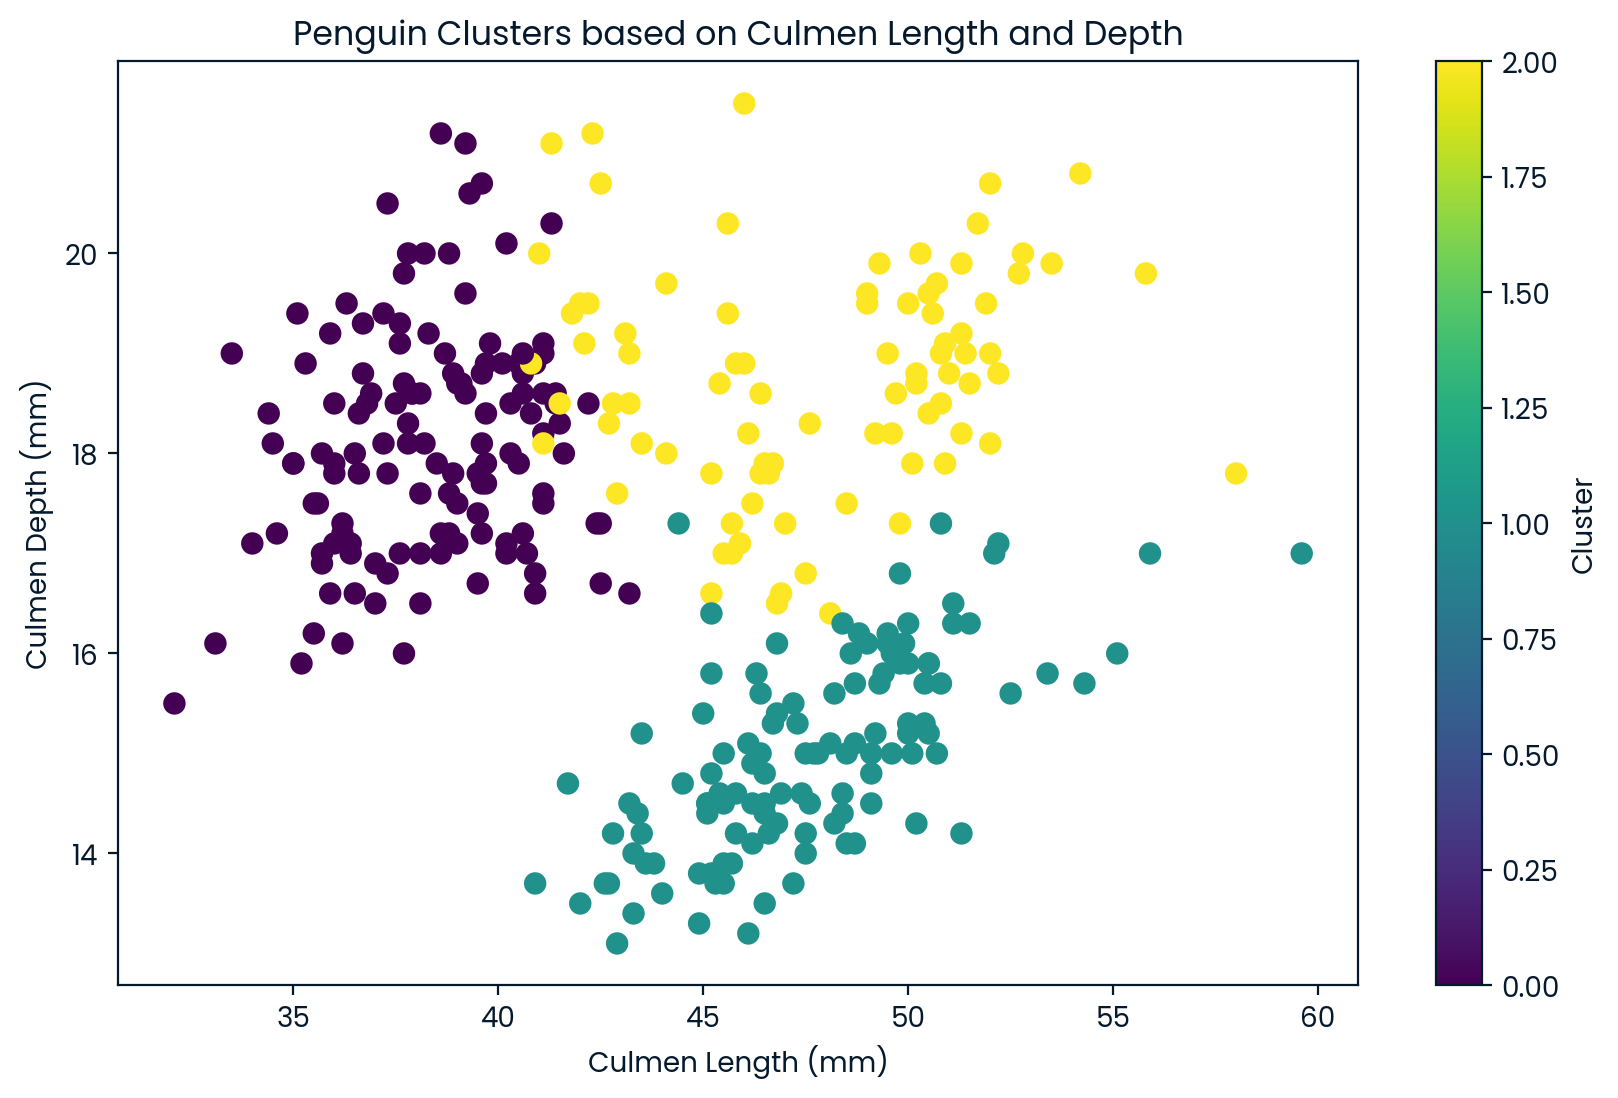

In [42]:
# Create a scatter plot of culmen_length_mm vs culmen_depth_mm, colored by the clusters
plt.figure(figsize=(10, 6))

# Scatter plot with color based on cluster
plt.scatter(penguins_df['culmen_length_mm'], 
            penguins_df['culmen_depth_mm'], 
            c=penguins_df['cluster'], cmap='viridis', s=50)

# Add labels and title
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguin Clusters based on Culmen Length and Depth')
plt.colorbar(label='Cluster')
plt.show()

In [43]:
# Group the DataFrame by 'cluster' and calculate the mean of numeric columns
stat_penguins = penguins_df.groupby('cluster').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,
0,38.305469,18.098437,188.554688,3587.500000,1.609375
1,47.568067,14.996639,217.235294,5092.436975,1.487395
2,47.662353,18.748235,196.917647,3898.235294,1.341176


In [44]:
# Drop non-numeric columns if any exist
stat_penguins = stat_penguins.drop(columns=['sex'], errors='ignore')

In [45]:
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               38.305469        18.098437         188.554688  3587.500000
1               47.568067        14.996639         217.235294  5092.436975
2               47.662353        18.748235         196.917647  3898.235294
